In [53]:
!pip install yfinance pandas scikit-learn matplotlib tensorflow



# Download and Visualize Bitcoin Data

In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

[*********************100%***********************]  1 of 1 completed


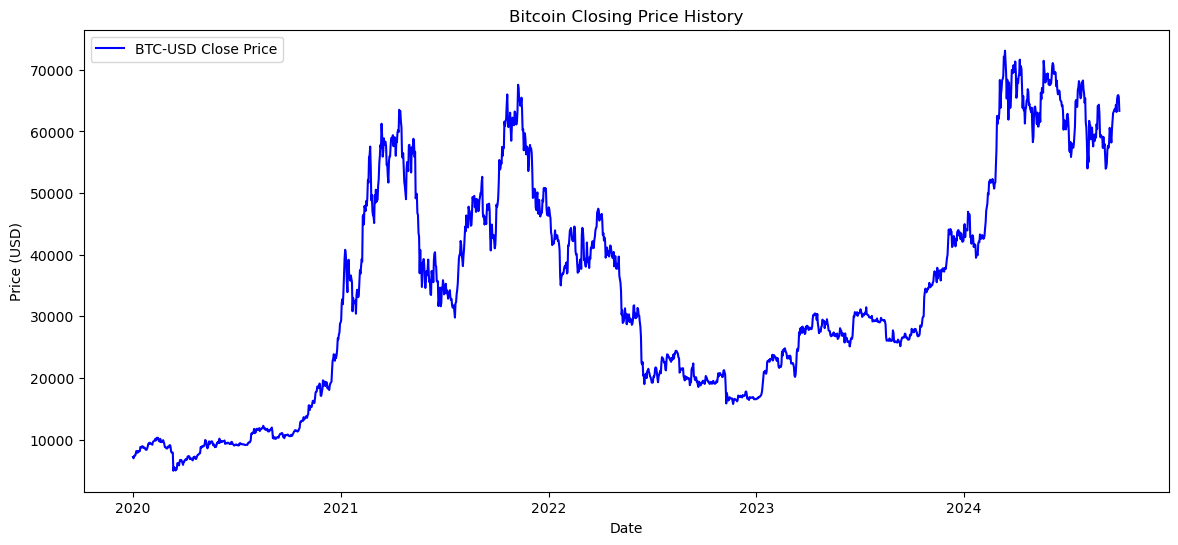

In [11]:
# Download Bitcoin data
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-10-01')

# Visualize the closing price
plt.figure(figsize=(14, 6))
plt.title('Bitcoin Closing Price History')
plt.plot(btc_data['Close'], color='blue', label='BTC-USD Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [37]:
btc_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-26,63138.546875,65790.796875,62669.269531,65181.019531,65181.019531,36873129847
2024-09-27,65180.664062,66480.695312,64852.992188,65790.664062,65790.664062,32058813449
2024-09-28,65792.179688,66255.531250,65458.035156,65887.648438,65887.648438,15243637984
2024-09-29,65888.898438,66069.343750,65450.015625,65635.304688,65635.304688,14788214575
2024-09-30,65634.656250,65635.054688,62873.617188,63329.500000,63329.500000,37112957475


# Preprocessing Data

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use only the closing price
btc_data = btc_data[['Close']]

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data)

# Create sequences for training the model
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define the sequence length (e.g., 60 days)
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Reshape X for LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


# Split Data into Training and Test Sets

In [41]:
# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



# Build the LSTM Model

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# Add the first LSTM layer with Dropout regularization
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add a second LSTM layer with Dropout regularization
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer with 50 neurons
model.add(Dense(units=50))

# Add an output layer with a single neuron for predicting the closing price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



C:\Users\mohsi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Train the Model with Early Stopping

In [47]:

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stop])



Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 7.3347e-04 - val_loss: 1.0273e-04
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 8.6713e-04 - val_loss: 1.8705e-04
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 7.9734e-04 - val_loss: 2.2269e-04
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 7.5601e-04 - val_loss: 1.4243e-04
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.9103e-04 - val_loss: 1.0807e-04
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 7.9662e-04 - val_loss: 9.8514e-05
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.8302e-04 - val_loss: 1.0213e-04
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 7.5120e-04 - val_loss: 9.8033e-05
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 8.0828e-04 - val_loss: 9.9726e-05
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 7.3866e-04 - val_loss: 9.5023e-05
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - lo

# Make Predictions and Rescale

In [48]:

predictions = model.predict(X_test)

# Rescale predictions back to the original price scale
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step


# Plot and Evaluate the Model

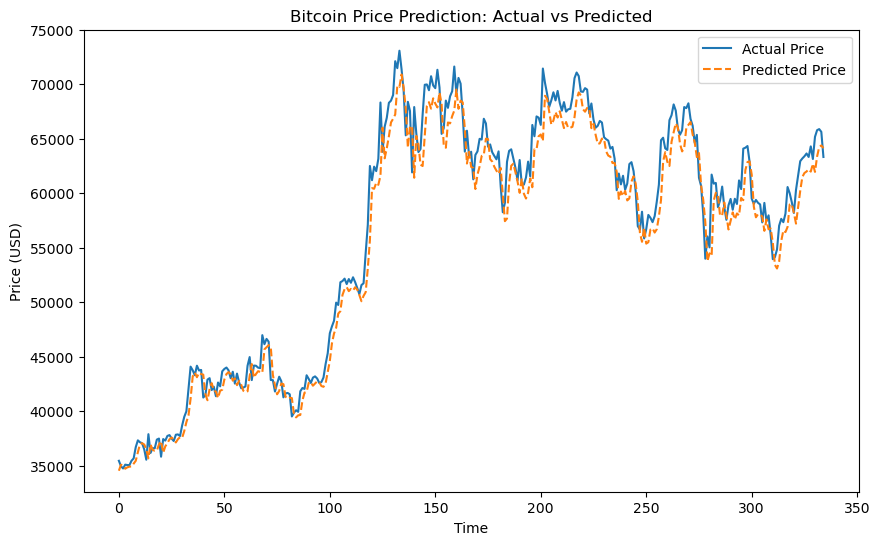

Root Mean Squared Error: 2000.9043580202178


In [49]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(predictions, label='Predicted Price', linestyle='dashed')
plt.title('Bitcoin Price Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Evaluate the model with RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f"Root Mean Squared Error: {rmse}")


In [66]:
import os
os.getcwd()

'C:\\Users\\mohsi\\ Projects'